In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! wget www.di.ens.fr/~lelarge/MNIST.tar.gz

--2024-11-07 21:45:04--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2024-11-07 21:45:04--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [   <=>              ]  33.20M  3.46MB/s    in 24s     

2024-11-07 21:45:30 (1.36 MB/s) - ‘MNIST.tar.gz’ saved [34813078]



In [3]:
! ls

1.ipynb  Lineaer_Regression.ipynb  MNIST.tar.gz


In [30]:
train_filepath = 'MNIST/processed/training.pt'
test_filepath = 'MNIST/processed/test.pt'

x, y = torch.load(train_filepath)


/tmp/ipykernel_110838/1500440429.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x, y = torch.load(train_filepath)


In [4]:
x.shape


torch.Size([60000, 28, 28])

In [5]:
y.shape


torch.Size([60000])

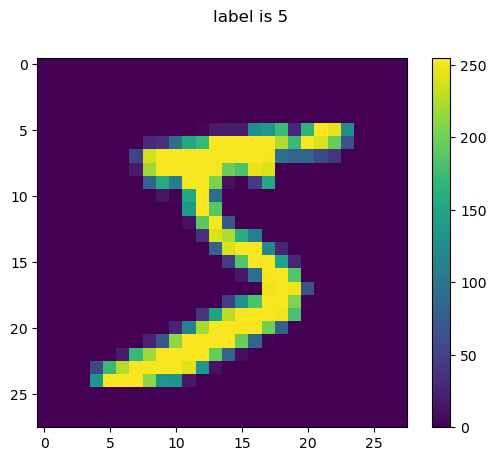

In [6]:
plt.imshow(x[0].numpy())
plt.suptitle(f'label is {y[0]}')
plt.colorbar()

In [7]:
# lets keep the x and y variables and look at some other variables
y_original = torch.tensor([2, 4, 3, 0, 1])
y_original

tensor([2, 4, 3, 0, 1])

In [20]:
y_original.shape

torch.Size([5])

In [9]:
y_one_hot_encoded = F.one_hot(y_original)
print(y_one_hot_encoded)

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])


In [21]:
y_one_hot_encoded.shape

torch.Size([5, 5])

In [13]:
print(y)
print(y.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


In [12]:
y_new = F.one_hot(y, num_classes=10)
y_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])

In [14]:
print(y_new.shape)

torch.Size([60000, 10])


images are 28 x 28 pixels, but we want to turn the images (the xs) into a vector

In [15]:
x.shape

torch.Size([60000, 28, 28])

In [16]:
first_dim = 28
second_dim = 28
x.view(-1, first_dim * second_dim).shape

torch.Size([60000, 784])

In [17]:
x.shape

torch.Size([60000, 28, 28])

In [23]:
x

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [19]:
x_new = x.view(-1, first_dim * second_dim)
x_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [24]:
print(x.shape)
print(y.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [27]:
n_examples, first_dim, second_dim = x.shape
n_classes = y.shape[0]

60000

In [36]:
class MNIST_Dataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255
        # originally y.shape = n_examples
        self.y = F.one_hot(self.y, num_classes=10).float()
        # now y.shape = [n_examples, num_classes]

    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    

In [37]:
train_dataset = MNIST_Dataset(train_filepath)
test_dataset = MNIST_Dataset(test_filepath)

/tmp/ipykernel_110838/303451288.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.x, self.y = torch.load(filepath)


In [38]:
print(train_dataset)

In [39]:
print(len(train_dataset))

60000


In [41]:
xs, ys = train_dataset[0:4]
print(x.shape)
print(y.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [42]:
train_dataloader = DataLoader(train_dataset, batch_size=5)
print(train_dataloader)

In [44]:
for x_batch, y_batch in train_dataloader:
    print(f'x_batch.shape: {x_batch.shape}')
    # x_batch has shape [batch_size, first_dim, second_dim]
    print(f'y_batch.shape: {y_batch.shape}')
    # y has shape [batch_size, num_targets]

x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])

In [99]:
class MLP(nn.Module):
    def __init__(self, num_features, num_targets, n_hidden, n_layers):
        super().__init__()
    
        self.num_features = num_features

        self.input_layer = nn.Sequential(
            nn.Linear(num_features, n_hidden),
            nn.ReLU()
        )
        
        self.layers = nn.ModuleList()
        for i in range(n_layers):
            self.layers.append(
                nn.Sequential(
                    nn.Linear(n_hidden, n_hidden),
                              nn.ReLU()
                              ))

        self.output_layer = nn.Sequential(
            nn.Linear(n_hidden, num_targets),
                                     nn.ReLU())
    
    def forward(self, x):
        # print(f'x.shape: {x.shape}')
        x = x.view(-1, self.num_features)
        # print(f'x.shape: {x.shape}')
        x = self.input_layer(x)

        for layer in self.layers:
            x = layer(x)
        x = self.output_layer(x)
        return x
    

In [83]:
print(f'y.shape: {y.shape}')
num_classes = 10
n_features = x.shape[1] * x.shape[2]
n_targets = num_classes # y.shape[0]
print(f'n_features: {n_features}')
print(f'n_targets: {n_targets}')


y.shape: torch.Size([60000])
n_features: 784
n_targets: 10


In [86]:
model = MLP(num_features=n_features, num_targets=n_targets, n_hidden=16, n_layers=2)

L = nn.CrossEntropyLoss()

for x_batch, y_batch in train_dataloader:
    print(f'x_batch.shape: {x_batch.shape}')
    # x_batch has shape [batch_size, first_dim, second_dim]
    print(f'y_batch.shape: {y_batch.shape}')
    # y has shape [batch_size, num_targets]
    model_out = model(x_batch)
    print(f'model_out.shape: {model_out.shape}')
    print(f'y_batch.shape: {y_batch.shape}')

    loss = L(model_out, y_batch)
    print(f'loss: {loss}')


x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x.shape: torch.Size([5, 28, 28])
x.shape: torch.Size([5, 784])
model_out.shape: torch.Size([5, 10])
y_batch.shape: torch.Size([5, 10])
loss: 2.2858781814575195
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x.shape: torch.Size([5, 28, 28])
x.shape: torch.Size([5, 784])
model_out.shape: torch.Size([5, 10])
y_batch.shape: torch.Size([5, 10])
loss: 2.299898147583008
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x.shape: torch.Size([5, 28, 28])
x.shape: torch.Size([5, 784])
model_out.shape: torch.Size([5, 10])
y_batch.shape: torch.Size([5, 10])
loss: 2.260181427001953
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x.shape: torch.Size([5, 28, 28])
x.shape: torch.Size([5, 784])
model_out.shape: torch.Size([5, 10])
y_batch.shape: torch.Size([5, 10])
loss: 2.339916944503784
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5

In [103]:
def train_MLP(n_epochs, train_dataloader):
    model = MLP(num_features=n_features, num_targets=n_targets, n_hidden=16, n_layers=2)
    L = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    for epoch in range(n_epochs):
        print(f'epoch = {epoch}')
        for x_batch, y_batch in train_dataloader:
            # print(f'x_batch.shape: {x_batch.shape}')
            # x_batch has shape [batch_size, first_dim, second_dim]
            # print(f'y_batch.shape: {y_batch.shape}')
            # y has shape [batch_size, num_targets]
            model_out = model(x_batch)
            # print(f'model_out.shape: {model_out.shape}')
            # print(f'y_batch.shape: {y_batch.shape}')

            loss = L(model_out, y_batch)
            print(f'loss: {loss}')

            loss.backward()
            optimizer.step()

    return model

In [107]:
len(train_dataloader)

12000

In [116]:
model = train_MLP(n_epochs=5, train_dataloader=train_dataloader)

epoch = 0
loss: 2.2771201133728027
loss: 2.329310417175293
loss: 2.3582088947296143
loss: 2.3112354278564453
loss: 2.2690799236297607
loss: 2.3407397270202637
loss: 2.281250476837158
loss: 2.325373888015747
loss: 2.3165035247802734
loss: 2.295619487762451
loss: 2.2886621952056885
loss: 2.236603260040283
loss: 2.2259325981140137
loss: 2.289232015609741
loss: 2.3366646766662598
loss: 2.3139443397521973
loss: 2.30889630317688
loss: 2.2336926460266113
loss: 2.294771909713745
loss: 2.300407886505127
loss: 2.345694065093994
loss: 2.2985129356384277
loss: 2.2687859535217285
loss: 2.217623233795166
loss: 2.325923204421997
loss: 2.2660765647888184
loss: 2.271289348602295
loss: 2.3030035495758057
loss: 2.325207471847534
loss: 2.3452184200286865
loss: 2.2205333709716797
loss: 2.304213047027588
loss: 2.186455249786377
loss: 2.2122106552124023
loss: 2.269649028778076
loss: 2.3253915309906006
loss: 2.3038582801818848
loss: 2.3730664253234863
loss: 2.263662338256836
loss: 2.3160414695739746
loss: 2.2

In [117]:
x_test, y_test = test_dataset[:2000]
y_test

tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [118]:
preds = model(x_test)
print(preds)
print(preds.shape)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ReluBackward0>)
torch.Size([2000, 10])


In [119]:
preds = preds.argmax(axis=1)
print(preds)
print(preds.shape)

tensor([0, 0, 0,  ..., 0, 0, 0])
torch.Size([2000])


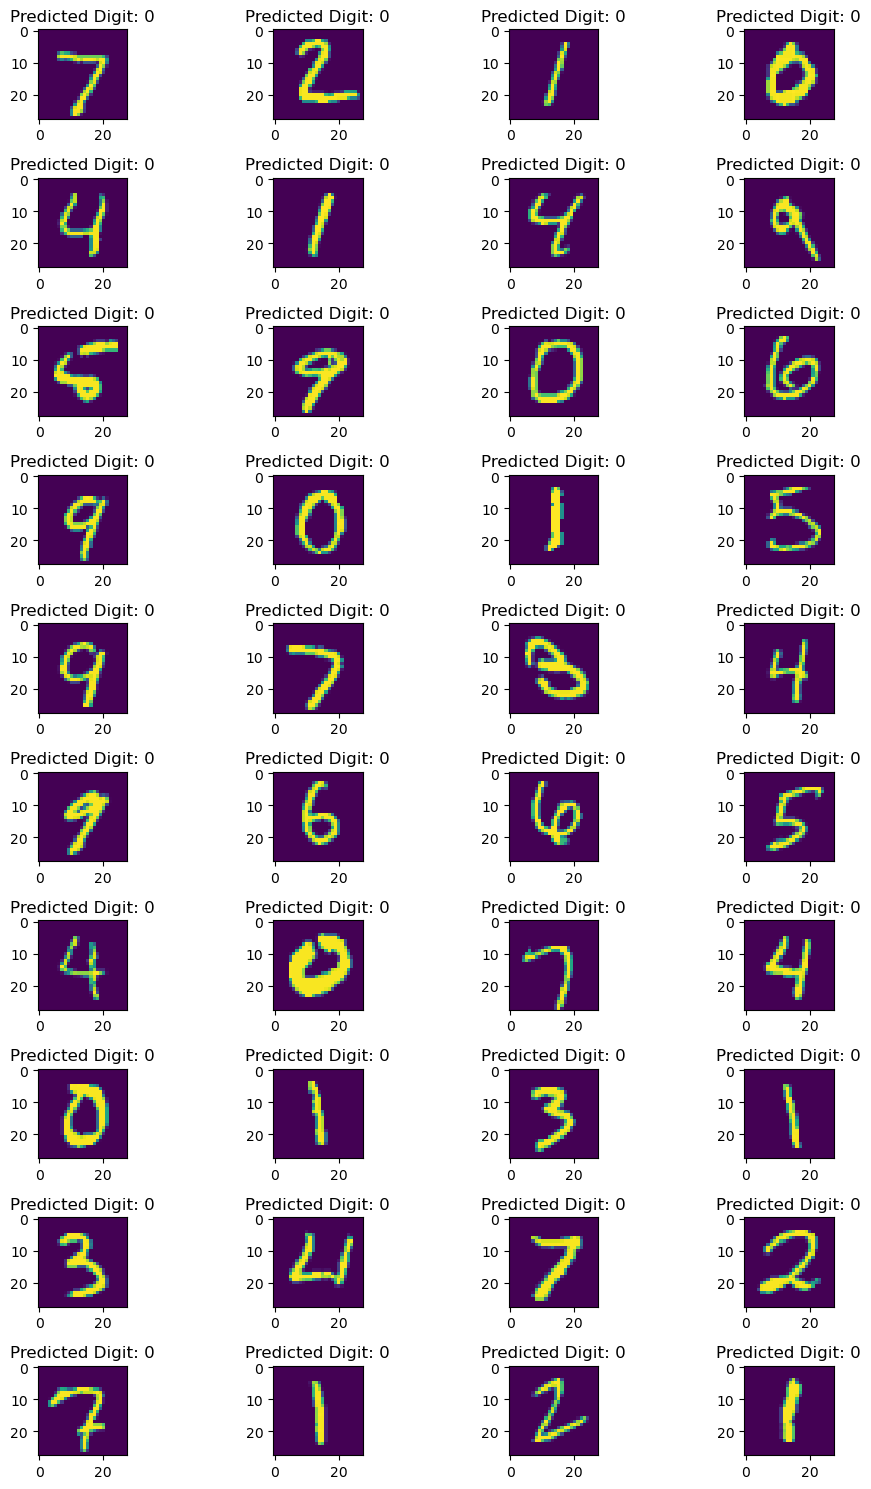

In [120]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    #activate the i+1 subplot
    plt.subplot(10,4,i+1)
    plt.imshow(x_test[i])
    yhat = preds[i]
    plt.title(f'Predicted Digit: {yhat}')
fig.tight_layout()
plt.show()